# Stack Overflow Analysis of Web + Cloud Developers
This notebook uses the [2021 StackOverflow Devloper Survey](https://insights.stackoverflow.com/survey/2021) to identify trends and segments within the web development community who use the cloud. The [original raw data can be found here](https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2021.zip). You can access [raw results from previous years here](https://insights.stackoverflow.com/survey?_ga=2.100576350.1742819261.1633974592-1034967139.1632965423).

## Core Questions to be answered
1. What are the most signifigant user segments users on Azure versus other clouds?
2. What are the meaningful cohorts / subsegments of the cloud user base according to the data?
3. How do the demographics of Azure users differ from other clouds?

To reduce the ramp-up time, we have done some basic data preparation and recreated some of the [summary statistics from the published results](https://insights.stackoverflow.com/survey/2021?_ga=2.96952415.1742819261.1633974592-1034967139.1632965423). 

In [77]:
import pandas as pd
import numpy as np
import ipywidgets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [76]:
def expand_multivalue_column(df: pd.DataFrame, column:str, delimeter:str=';'):
    """Convert a delimited string column into one-hot encoded series for each unique string
        Example: 
        'Coding Bootcamp;Other' becomes 'Coding Bootcamp (true) | Other(true) | ...
    """
    df[column].dropna(inplace=True)
    df = df.assign(**{column:python_results[column].str.split(delimeter)})
    return pd.get_dummies(df[column].apply(pd.Series).stack()).groupby(level=1).sum()

def plot_column_values(df: pd.DataFrame, column:str, title:str, num_results:int=15):
    """Plot the top N values of a column in a bar chart"""
    df[column].value_counts().head(num_results).plot(kind='bar', title=title)

def plot_column_values(series: pd.Series, title:str, num_results:int=15):
    """Plot the values of a series in a bar chart"""
    series.value_counts().head(num_results).plot(kind='bar', title=title)

def plot_multivalue_column(df: pd.DataFrame, column:str, title:str):
    """Utility to split up a string-delimited column and plot the counts of each string token"""
    expand_multivalue_column(df,column).sum().sort_values(ascending=False).plot(kind='bar', title=title)

In [4]:
raw_results = pd.read_csv('survey_results_public.csv')
raw_results

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0


In [5]:
schema = pd.read_csv('survey_results_schema.csv')
schema

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
6,QID7,US_State,<p>In which state or territory of the USA do y...,False,MC,DL
7,QID9,UK_Country,In which part of the United Kingdom do you liv...,False,MC,DL
8,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
9,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR


Filter down the original data set to only respondents who have used or desire to use Python. Depending on the focus, it may be helpful to break this down even further.

In [11]:
python_results = raw_results[raw_results.LanguageHaveWorkedWith.str.contains('Python')==True |
                             raw_results.LanguageWantToWorkWith.str.contains('Python')].copy()
python_results

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
5,6,I am a student who is learning to code,"Student, part-time",United States of America,Georgia,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Prefer not to say,No,Straight / Heterosexual,Prefer not to say,None of the above,I have a concentration and/or memory disorder ...,Too long,Neither easy nor difficult,NaN
9,10,I am a developer by profession,Employed full-time,Sweden,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,School,7,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,51552.0
15,16,I am a student who is learning to code,"Student, full-time",United States of America,Missouri,NaN,"Secondary school (e.g. American high school, G...",5 - 10 years,Other (please specify):,7,...,Under 18 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83429,83430,I code primarily as a hobby,"Not employed, but looking for work",United States of America,Washington,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,"Other online resources (ex: videos, blogs, etc)",6,...,25-34 years old,"Man;Or, in your own words:",Yes,Queer,White or of European descent,I am unable to / find it difficult to walk or ...,I have an anxiety disorder,Appropriate in length,Neither easy nor difficult,NaN
83430,83431,I am a developer by profession,Employed full-time,United States of America,Illinois,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",23,...,45-54 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,125000.0
83431,83432,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Pakistan,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",9,...,18-24 years old,Man,No,Straight / Heterosexual,Southeast Asian,None of the above,None of the above,Appropriate in length,Easy,11676.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0


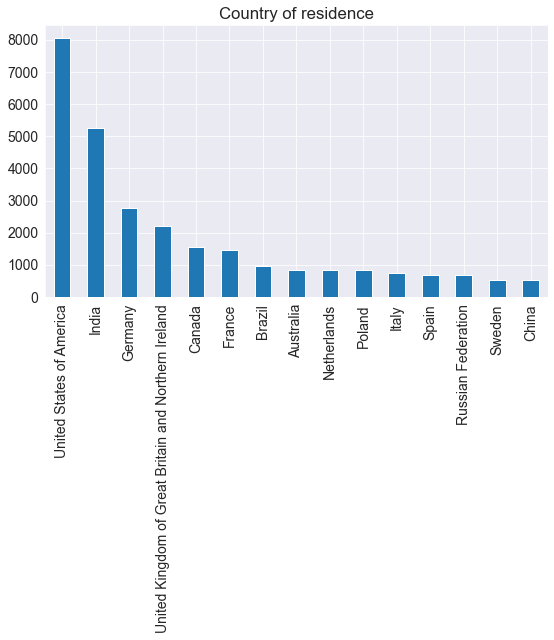

In [12]:
plot_column_values(python_results.Country, 'Country of residence')

Text(0, 0.5, 'Number of respondents')

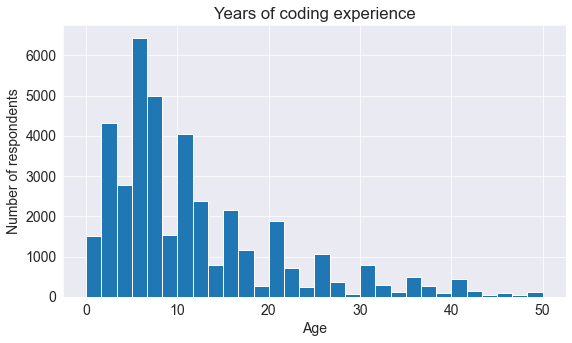

In [37]:
year_upperbound = 50
year_substitutions = {'Less than 1 year':0, 'More than 50 years':year_upperbound}
def coerce_years(value):
    try: 
        if int(value) >= year_upperbound:
            return int(year_upperbound)
        else:
            return int(value)
    except ValueError:
        return int(year_substitutions[value])

years_df = python_results.YearsCode.dropna().apply(lambda x: coerce_years(x))
years_df.hist(bins=30)
plt.title('Years of coding experience')
plt.xlabel('Age')
plt.ylabel('Number of respondents')

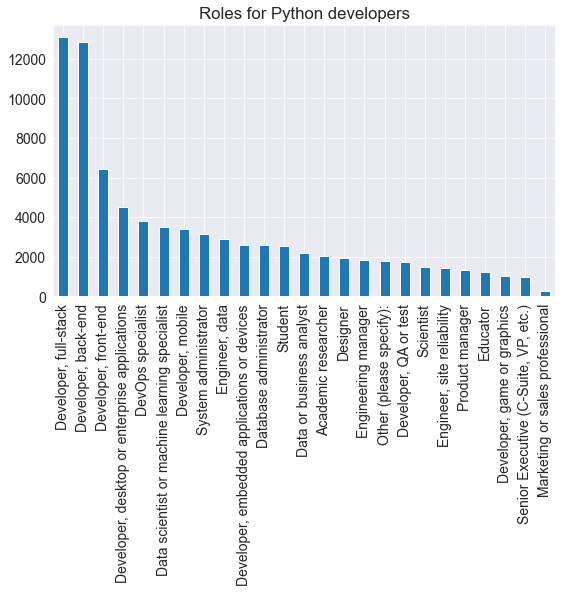

In [38]:
plot_multivalue_column(python_results,'DevType', 'Roles for Python developers')

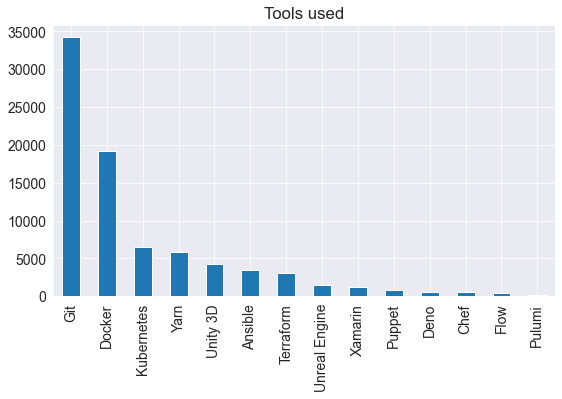

In [40]:
plot_multivalue_column(python_results, 'ToolsTechHaveWorkedWith', title='Tools used')

<AxesSubplot:title={'center':'Additional languages used by Python Users'}>

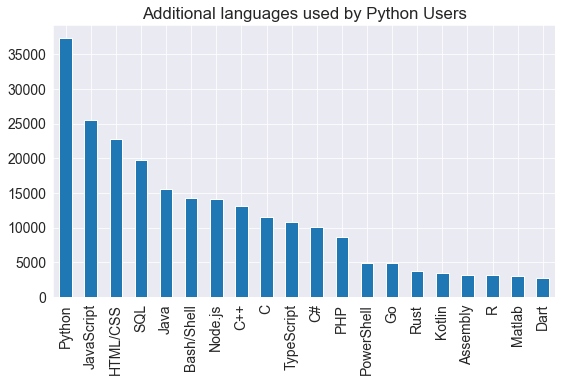

In [41]:
expand_multivalue_column(python_results, 'LanguageHaveWorkedWith').sum().sort_values(ascending=False).head(20).plot(kind='bar', title='Additional languages used by Python Users')


<AxesSubplot:title={'center':'Additional languages used by Python Users'}>

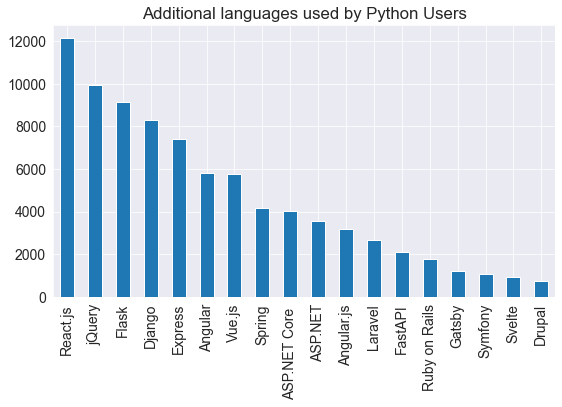

In [42]:
expand_multivalue_column(python_results, 'WebframeHaveWorkedWith').sum().sort_values(ascending=False).head(20).plot(kind='bar', title='Additional languages used by Python Users')


# What are the most signifigant users among Python users on Azure versus other clouds?
Are Azure users older? Are some roles more common on AWS than Azure?

In [ ]:
''' Initial exploration of correlation between role and cloud usage'''
df = python_results.copy()
clouds_df = expand_multivalue_column(df, 'PlatformHaveWorkedWith')
roles_df = expand_multivalue_column(df, 'DevType')
sparse_df = pd.concat([roles_df, clouds_df], axis=1)
corr = sparse_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Identifying meaningful customer segments
How might we define meaningful segments among Python respondents? Which features in the data appear most important?

# What are the meaningful cohorts / subsegments of the Python user base according to the data?


# How do the demographics of Python users from other programming language users?